In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import time 
from splinter import Browser
# from textblob import TextBlob
import nltk
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/o/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
unable to import 'smart_open.gcs', disabling that module


In [93]:



librivox_id_search = 'https://librivox.org/api/feed/audiobooks/?id=47'

# import requests
browser.visit(librivox_id_search)
librivox_id_search_page = browser.html

soup = BeautifulSoup(librivox_id_search_page, 'html.parser')

soup.find("description")


<description>&lt;p&gt;&lt;i&gt;The Count of Monte Cristo&lt;/i&gt; (French: &lt;i&gt;Le Comte de Monte-Cristo&lt;/i&gt;) is an adventure novel by Alexandre Dumas, père. It is often considered, along with &lt;i&gt;The Three Musketeers&lt;/i&gt;, as Dumas's most popular work. The writing of the work was completed in 1844. Like many of his novels, it is expanded from the plot outlines suggested by his collaborating ghostwriter Auguste Maquet.&lt;/p&gt;&lt;p&gt;The story takes place in France, Italy, islands in the Mediterranean and the Levant during the historical events of 1815–1838 (from just before the Hundred Days through the reign of Louis-Philippe of France). The historical setting is a fundamental element of the book. It is primarily concerned with themes of justice, vengeance, mercy, and forgiveness, and is told in the style of an adventure story. (Summary from Wikipedia)&lt;/p&gt;
&lt;p&gt;This book contains alternate versions of a number of chapters – indicated by an alt after t

In [86]:

executable_path = {'executable_path':'../resources/chromedriver'}
browser = Browser('chrome', **executable_path)



book_objs=[]

for x in range(10000):
    print("Searching Librivox ID: ",x)
    librivox_id_search = f'https://librivox.org/api/feed/audiobooks/?id={x}'
    try:
        browser.visit(librivox_id_search)
        librivox_id_search_page = browser.html
        soup = BeautifulSoup(librivox_id_search_page, 'html.parser')
        lib_id=soup.find("id").get_text()
        title=soup.find("title").get_text()
        description=soup.find("description").get_text()
        language=soup.find("language").get_text()
        copyright_year=soup.find("copyright_year").get_text()
        book_objs.append({"lib_id":lib_id,
                      "title":title,
                      "description":description,
                      "language":language,
                      "copyright_year":copyright_year                      
                         })
    except: 
        print("couldn't locate")

Searching Librivox ID:  0
Searching Librivox ID:  1
couldn't locate
Searching Librivox ID:  2
couldn't locate
Searching Librivox ID:  3
couldn't locate
Searching Librivox ID:  4
couldn't locate
Searching Librivox ID:  5
couldn't locate
Searching Librivox ID:  6
couldn't locate
Searching Librivox ID:  7
couldn't locate
Searching Librivox ID:  8
couldn't locate
Searching Librivox ID:  9
couldn't locate
Searching Librivox ID:  10
couldn't locate
Searching Librivox ID:  11
couldn't locate
Searching Librivox ID:  12
couldn't locate
Searching Librivox ID:  13
couldn't locate
Searching Librivox ID:  14
couldn't locate
Searching Librivox ID:  15
couldn't locate
Searching Librivox ID:  16
couldn't locate
Searching Librivox ID:  17
couldn't locate
Searching Librivox ID:  18
couldn't locate
Searching Librivox ID:  19
couldn't locate
Searching Librivox ID:  20
couldn't locate
Searching Librivox ID:  21
couldn't locate
Searching Librivox ID:  22
couldn't locate
Searching Librivox ID:  23
couldn't l

Searching Librivox ID:  248
Searching Librivox ID:  249
Searching Librivox ID:  250
Searching Librivox ID:  251
Searching Librivox ID:  252
Searching Librivox ID:  253
Searching Librivox ID:  254
Searching Librivox ID:  255
Searching Librivox ID:  256
Searching Librivox ID:  257
Searching Librivox ID:  258
Searching Librivox ID:  259
Searching Librivox ID:  260
Searching Librivox ID:  261
Searching Librivox ID:  262
Searching Librivox ID:  263
Searching Librivox ID:  264
Searching Librivox ID:  265
Searching Librivox ID:  266
Searching Librivox ID:  267
Searching Librivox ID:  268
Searching Librivox ID:  269
Searching Librivox ID:  270
Searching Librivox ID:  271
Searching Librivox ID:  272
Searching Librivox ID:  273
Searching Librivox ID:  274
Searching Librivox ID:  275
Searching Librivox ID:  276
Searching Librivox ID:  277
Searching Librivox ID:  278
Searching Librivox ID:  279
Searching Librivox ID:  280
Searching Librivox ID:  281
Searching Librivox ID:  282
Searching Librivox I

Searching Librivox ID:  528
couldn't locate
Searching Librivox ID:  529
Searching Librivox ID:  530
Searching Librivox ID:  531
Searching Librivox ID:  532
Searching Librivox ID:  533
Searching Librivox ID:  534
Searching Librivox ID:  535
Searching Librivox ID:  536
Searching Librivox ID:  537
Searching Librivox ID:  538
Searching Librivox ID:  539
Searching Librivox ID:  540
Searching Librivox ID:  541
Searching Librivox ID:  542
Searching Librivox ID:  543
Searching Librivox ID:  544
Searching Librivox ID:  545
Searching Librivox ID:  546
Searching Librivox ID:  547
Searching Librivox ID:  548
couldn't locate
Searching Librivox ID:  549
Searching Librivox ID:  550
Searching Librivox ID:  551
Searching Librivox ID:  552
Searching Librivox ID:  553
Searching Librivox ID:  554
Searching Librivox ID:  555
couldn't locate
Searching Librivox ID:  556
Searching Librivox ID:  557
Searching Librivox ID:  558
Searching Librivox ID:  559
Searching Librivox ID:  560
Searching Librivox ID:  561


Searching Librivox ID:  789
couldn't locate
Searching Librivox ID:  790
couldn't locate
Searching Librivox ID:  791
couldn't locate
Searching Librivox ID:  792
Searching Librivox ID:  793
Searching Librivox ID:  794
couldn't locate
Searching Librivox ID:  795
Searching Librivox ID:  796
couldn't locate
Searching Librivox ID:  797
Searching Librivox ID:  798
Searching Librivox ID:  799
couldn't locate
Searching Librivox ID:  800
Searching Librivox ID:  801
Searching Librivox ID:  802
Searching Librivox ID:  803
Searching Librivox ID:  804
Searching Librivox ID:  805
Searching Librivox ID:  806
Searching Librivox ID:  807
Searching Librivox ID:  808
couldn't locate
Searching Librivox ID:  809
couldn't locate
Searching Librivox ID:  810
Searching Librivox ID:  811
couldn't locate
Searching Librivox ID:  812
Searching Librivox ID:  813
couldn't locate
Searching Librivox ID:  814
Searching Librivox ID:  815
Searching Librivox ID:  816
Searching Librivox ID:  817
Searching Librivox ID:  818


Searching Librivox ID:  1055
Searching Librivox ID:  1056
Searching Librivox ID:  1057
Searching Librivox ID:  1058
Searching Librivox ID:  1059
Searching Librivox ID:  1060
Searching Librivox ID:  1061
Searching Librivox ID:  1062
Searching Librivox ID:  1063
Searching Librivox ID:  1064
Searching Librivox ID:  1065
Searching Librivox ID:  1066
Searching Librivox ID:  1067
Searching Librivox ID:  1068
Searching Librivox ID:  1069
Searching Librivox ID:  1070
Searching Librivox ID:  1071
couldn't locate
Searching Librivox ID:  1072
Searching Librivox ID:  1073
Searching Librivox ID:  1074
Searching Librivox ID:  1075
Searching Librivox ID:  1076
Searching Librivox ID:  1077
Searching Librivox ID:  1078
Searching Librivox ID:  1079
Searching Librivox ID:  1080
Searching Librivox ID:  1081
Searching Librivox ID:  1082
Searching Librivox ID:  1083
Searching Librivox ID:  1084
Searching Librivox ID:  1085
Searching Librivox ID:  1086
Searching Librivox ID:  1087
Searching Librivox ID:  108

Searching Librivox ID:  1326
Searching Librivox ID:  1327
Searching Librivox ID:  1328
Searching Librivox ID:  1329
Searching Librivox ID:  1330
Searching Librivox ID:  1331
Searching Librivox ID:  1332
Searching Librivox ID:  1333
Searching Librivox ID:  1334
Searching Librivox ID:  1335
Searching Librivox ID:  1336
Searching Librivox ID:  1337
Searching Librivox ID:  1338
Searching Librivox ID:  1339
couldn't locate
Searching Librivox ID:  1340
couldn't locate
Searching Librivox ID:  1341
Searching Librivox ID:  1342
Searching Librivox ID:  1343
Searching Librivox ID:  1344
Searching Librivox ID:  1345
couldn't locate
Searching Librivox ID:  1346
Searching Librivox ID:  1347
Searching Librivox ID:  1348
Searching Librivox ID:  1349
Searching Librivox ID:  1350
Searching Librivox ID:  1351
Searching Librivox ID:  1352
Searching Librivox ID:  1353
Searching Librivox ID:  1354
Searching Librivox ID:  1355
Searching Librivox ID:  1356
Searching Librivox ID:  1357
couldn't locate
Searchin

Searching Librivox ID:  1598
Searching Librivox ID:  1599
Searching Librivox ID:  1600
Searching Librivox ID:  1601
Searching Librivox ID:  1602
Searching Librivox ID:  1603
Searching Librivox ID:  1604
couldn't locate
Searching Librivox ID:  1605
Searching Librivox ID:  1606
Searching Librivox ID:  1607
Searching Librivox ID:  1608
Searching Librivox ID:  1609
couldn't locate
Searching Librivox ID:  1610
Searching Librivox ID:  1611
Searching Librivox ID:  1612
Searching Librivox ID:  1613
Searching Librivox ID:  1614
Searching Librivox ID:  1615
Searching Librivox ID:  1616
Searching Librivox ID:  1617
Searching Librivox ID:  1618
Searching Librivox ID:  1619
Searching Librivox ID:  1620
Searching Librivox ID:  1621
Searching Librivox ID:  1622
Searching Librivox ID:  1623
Searching Librivox ID:  1624
Searching Librivox ID:  1625
Searching Librivox ID:  1626
Searching Librivox ID:  1627
couldn't locate
Searching Librivox ID:  1628
Searching Librivox ID:  1629
Searching Librivox ID:  

Searching Librivox ID:  1868
Searching Librivox ID:  1869
Searching Librivox ID:  1870
Searching Librivox ID:  1871
Searching Librivox ID:  1872
Searching Librivox ID:  1873
Searching Librivox ID:  1874
Searching Librivox ID:  1875
Searching Librivox ID:  1876
Searching Librivox ID:  1877
Searching Librivox ID:  1878
Searching Librivox ID:  1879
Searching Librivox ID:  1880
Searching Librivox ID:  1881
Searching Librivox ID:  1882
Searching Librivox ID:  1883
Searching Librivox ID:  1884
Searching Librivox ID:  1885
Searching Librivox ID:  1886
Searching Librivox ID:  1887
Searching Librivox ID:  1888
Searching Librivox ID:  1889
Searching Librivox ID:  1890
Searching Librivox ID:  1891
Searching Librivox ID:  1892
Searching Librivox ID:  1893
Searching Librivox ID:  1894
Searching Librivox ID:  1895
Searching Librivox ID:  1896
Searching Librivox ID:  1897
Searching Librivox ID:  1898
Searching Librivox ID:  1899
Searching Librivox ID:  1900
Searching Librivox ID:  1901
couldn't locat

Searching Librivox ID:  2143
Searching Librivox ID:  2144
Searching Librivox ID:  2145
Searching Librivox ID:  2146
Searching Librivox ID:  2147
Searching Librivox ID:  2148
Searching Librivox ID:  2149
Searching Librivox ID:  2150
Searching Librivox ID:  2151
Searching Librivox ID:  2152
Searching Librivox ID:  2153
Searching Librivox ID:  2154
Searching Librivox ID:  2155
Searching Librivox ID:  2156
Searching Librivox ID:  2157
Searching Librivox ID:  2158
Searching Librivox ID:  2159
Searching Librivox ID:  2160
couldn't locate
Searching Librivox ID:  2161
Searching Librivox ID:  2162
Searching Librivox ID:  2163
Searching Librivox ID:  2164
Searching Librivox ID:  2165
Searching Librivox ID:  2166
Searching Librivox ID:  2167
couldn't locate
Searching Librivox ID:  2168
Searching Librivox ID:  2169
Searching Librivox ID:  2170
Searching Librivox ID:  2171
Searching Librivox ID:  2172
Searching Librivox ID:  2173
Searching Librivox ID:  2174
Searching Librivox ID:  2175
couldn't lo

Searching Librivox ID:  2414
Searching Librivox ID:  2415
Searching Librivox ID:  2416
Searching Librivox ID:  2417
Searching Librivox ID:  2418
Searching Librivox ID:  2419
Searching Librivox ID:  2420
Searching Librivox ID:  2421
Searching Librivox ID:  2422
Searching Librivox ID:  2423
Searching Librivox ID:  2424
Searching Librivox ID:  2425
Searching Librivox ID:  2426
Searching Librivox ID:  2427
Searching Librivox ID:  2428
Searching Librivox ID:  2429
Searching Librivox ID:  2430
Searching Librivox ID:  2431
Searching Librivox ID:  2432
Searching Librivox ID:  2433
Searching Librivox ID:  2434
Searching Librivox ID:  2435
Searching Librivox ID:  2436
Searching Librivox ID:  2437
Searching Librivox ID:  2438
Searching Librivox ID:  2439
Searching Librivox ID:  2440
Searching Librivox ID:  2441
couldn't locate
Searching Librivox ID:  2442
Searching Librivox ID:  2443
Searching Librivox ID:  2444
Searching Librivox ID:  2445
Searching Librivox ID:  2446
Searching Librivox ID:  244

Searching Librivox ID:  2688
Searching Librivox ID:  2689
Searching Librivox ID:  2690
Searching Librivox ID:  2691
Searching Librivox ID:  2692
Searching Librivox ID:  2693
Searching Librivox ID:  2694
Searching Librivox ID:  2695
Searching Librivox ID:  2696
Searching Librivox ID:  2697
couldn't locate
Searching Librivox ID:  2698
couldn't locate
Searching Librivox ID:  2699
Searching Librivox ID:  2700
Searching Librivox ID:  2701
Searching Librivox ID:  2702
Searching Librivox ID:  2703
Searching Librivox ID:  2704
Searching Librivox ID:  2705
couldn't locate
Searching Librivox ID:  2706
Searching Librivox ID:  2707
Searching Librivox ID:  2708
Searching Librivox ID:  2709
Searching Librivox ID:  2710
Searching Librivox ID:  2711
Searching Librivox ID:  2712
Searching Librivox ID:  2713
Searching Librivox ID:  2714
Searching Librivox ID:  2715
Searching Librivox ID:  2716
Searching Librivox ID:  2717
couldn't locate
Searching Librivox ID:  2718
Searching Librivox ID:  2719
Searchin

Searching Librivox ID:  2963
Searching Librivox ID:  2964
Searching Librivox ID:  2965
Searching Librivox ID:  2966
Searching Librivox ID:  2967
couldn't locate
Searching Librivox ID:  2968
Searching Librivox ID:  2969
Searching Librivox ID:  2970
Searching Librivox ID:  2971
Searching Librivox ID:  2972
Searching Librivox ID:  2973
Searching Librivox ID:  2974
Searching Librivox ID:  2975
Searching Librivox ID:  2976
Searching Librivox ID:  2977
Searching Librivox ID:  2978
Searching Librivox ID:  2979
Searching Librivox ID:  2980
Searching Librivox ID:  2981
Searching Librivox ID:  2982
Searching Librivox ID:  2983
Searching Librivox ID:  2984
Searching Librivox ID:  2985
Searching Librivox ID:  2986
Searching Librivox ID:  2987
couldn't locate
Searching Librivox ID:  2988
Searching Librivox ID:  2989
Searching Librivox ID:  2990
Searching Librivox ID:  2991
Searching Librivox ID:  2992
Searching Librivox ID:  2993
Searching Librivox ID:  2994
Searching Librivox ID:  2995
Searching L

Searching Librivox ID:  3235
Searching Librivox ID:  3236
couldn't locate
Searching Librivox ID:  3237
Searching Librivox ID:  3238
Searching Librivox ID:  3239
Searching Librivox ID:  3240
Searching Librivox ID:  3241
Searching Librivox ID:  3242
Searching Librivox ID:  3243
Searching Librivox ID:  3244
Searching Librivox ID:  3245
Searching Librivox ID:  3246
Searching Librivox ID:  3247
Searching Librivox ID:  3248
Searching Librivox ID:  3249
Searching Librivox ID:  3250
Searching Librivox ID:  3251
Searching Librivox ID:  3252
Searching Librivox ID:  3253
Searching Librivox ID:  3254
couldn't locate
Searching Librivox ID:  3255
Searching Librivox ID:  3256
Searching Librivox ID:  3257
Searching Librivox ID:  3258
Searching Librivox ID:  3259
Searching Librivox ID:  3260
Searching Librivox ID:  3261
Searching Librivox ID:  3262
Searching Librivox ID:  3263
Searching Librivox ID:  3264
Searching Librivox ID:  3265
Searching Librivox ID:  3266
Searching Librivox ID:  3267
Searching L

Searching Librivox ID:  3511
Searching Librivox ID:  3512
Searching Librivox ID:  3513
Searching Librivox ID:  3514
Searching Librivox ID:  3515
Searching Librivox ID:  3516
Searching Librivox ID:  3517
Searching Librivox ID:  3518
Searching Librivox ID:  3519
Searching Librivox ID:  3520
Searching Librivox ID:  3521
Searching Librivox ID:  3522
Searching Librivox ID:  3523
Searching Librivox ID:  3524
Searching Librivox ID:  3525
Searching Librivox ID:  3526
Searching Librivox ID:  3527
Searching Librivox ID:  3528
Searching Librivox ID:  3529
Searching Librivox ID:  3530
Searching Librivox ID:  3531
Searching Librivox ID:  3532
Searching Librivox ID:  3533
Searching Librivox ID:  3534
Searching Librivox ID:  3535
Searching Librivox ID:  3536
Searching Librivox ID:  3537
couldn't locate
Searching Librivox ID:  3538
Searching Librivox ID:  3539
Searching Librivox ID:  3540
Searching Librivox ID:  3541
Searching Librivox ID:  3542
Searching Librivox ID:  3543
Searching Librivox ID:  354

Searching Librivox ID:  3784
Searching Librivox ID:  3785
Searching Librivox ID:  3786
couldn't locate
Searching Librivox ID:  3787
Searching Librivox ID:  3788
Searching Librivox ID:  3789
Searching Librivox ID:  3790
Searching Librivox ID:  3791
Searching Librivox ID:  3792
Searching Librivox ID:  3793
Searching Librivox ID:  3794
Searching Librivox ID:  3795
Searching Librivox ID:  3796
Searching Librivox ID:  3797
Searching Librivox ID:  3798
Searching Librivox ID:  3799
Searching Librivox ID:  3800
Searching Librivox ID:  3801
Searching Librivox ID:  3802
Searching Librivox ID:  3803
Searching Librivox ID:  3804
Searching Librivox ID:  3805
Searching Librivox ID:  3806
Searching Librivox ID:  3807
Searching Librivox ID:  3808
Searching Librivox ID:  3809
Searching Librivox ID:  3810
Searching Librivox ID:  3811
couldn't locate
Searching Librivox ID:  3812
Searching Librivox ID:  3813
Searching Librivox ID:  3814
Searching Librivox ID:  3815
Searching Librivox ID:  3816
Searching L

Searching Librivox ID:  4060
Searching Librivox ID:  4061
Searching Librivox ID:  4062
Searching Librivox ID:  4063
Searching Librivox ID:  4064
Searching Librivox ID:  4065
Searching Librivox ID:  4066
Searching Librivox ID:  4067
Searching Librivox ID:  4068
Searching Librivox ID:  4069
Searching Librivox ID:  4070
Searching Librivox ID:  4071
Searching Librivox ID:  4072
Searching Librivox ID:  4073
Searching Librivox ID:  4074
Searching Librivox ID:  4075
Searching Librivox ID:  4076
Searching Librivox ID:  4077
Searching Librivox ID:  4078
Searching Librivox ID:  4079
Searching Librivox ID:  4080
Searching Librivox ID:  4081
Searching Librivox ID:  4082
Searching Librivox ID:  4083
Searching Librivox ID:  4084
Searching Librivox ID:  4085
couldn't locate
Searching Librivox ID:  4086
Searching Librivox ID:  4087
Searching Librivox ID:  4088
Searching Librivox ID:  4089
Searching Librivox ID:  4090
Searching Librivox ID:  4091
Searching Librivox ID:  4092
Searching Librivox ID:  409

Searching Librivox ID:  4337
Searching Librivox ID:  4338
Searching Librivox ID:  4339
Searching Librivox ID:  4340
Searching Librivox ID:  4341
Searching Librivox ID:  4342
Searching Librivox ID:  4343
Searching Librivox ID:  4344
Searching Librivox ID:  4345
couldn't locate
Searching Librivox ID:  4346
couldn't locate
Searching Librivox ID:  4347
Searching Librivox ID:  4348
Searching Librivox ID:  4349
Searching Librivox ID:  4350
couldn't locate
Searching Librivox ID:  4351
Searching Librivox ID:  4352
Searching Librivox ID:  4353
Searching Librivox ID:  4354
couldn't locate
Searching Librivox ID:  4355
Searching Librivox ID:  4356
Searching Librivox ID:  4357
Searching Librivox ID:  4358
Searching Librivox ID:  4359
Searching Librivox ID:  4360
Searching Librivox ID:  4361
Searching Librivox ID:  4362
Searching Librivox ID:  4363
Searching Librivox ID:  4364
Searching Librivox ID:  4365
Searching Librivox ID:  4366
Searching Librivox ID:  4367
Searching Librivox ID:  4368
Searchin

Searching Librivox ID:  4611
Searching Librivox ID:  4612
Searching Librivox ID:  4613
Searching Librivox ID:  4614
Searching Librivox ID:  4615
Searching Librivox ID:  4616
Searching Librivox ID:  4617
Searching Librivox ID:  4618
Searching Librivox ID:  4619
Searching Librivox ID:  4620
Searching Librivox ID:  4621
Searching Librivox ID:  4622
Searching Librivox ID:  4623
Searching Librivox ID:  4624
Searching Librivox ID:  4625
Searching Librivox ID:  4626
Searching Librivox ID:  4627
Searching Librivox ID:  4628
Searching Librivox ID:  4629
Searching Librivox ID:  4630
Searching Librivox ID:  4631
Searching Librivox ID:  4632
Searching Librivox ID:  4633
Searching Librivox ID:  4634
Searching Librivox ID:  4635
Searching Librivox ID:  4636
Searching Librivox ID:  4637
Searching Librivox ID:  4638
Searching Librivox ID:  4639
Searching Librivox ID:  4640
Searching Librivox ID:  4641
Searching Librivox ID:  4642
Searching Librivox ID:  4643
Searching Librivox ID:  4644
Searching Libr

Searching Librivox ID:  4890
Searching Librivox ID:  4891
Searching Librivox ID:  4892
couldn't locate
Searching Librivox ID:  4893
Searching Librivox ID:  4894
Searching Librivox ID:  4895
Searching Librivox ID:  4896
Searching Librivox ID:  4897
Searching Librivox ID:  4898
Searching Librivox ID:  4899
Searching Librivox ID:  4900
Searching Librivox ID:  4901
Searching Librivox ID:  4902
Searching Librivox ID:  4903
Searching Librivox ID:  4904
Searching Librivox ID:  4905
Searching Librivox ID:  4906
Searching Librivox ID:  4907
Searching Librivox ID:  4908
Searching Librivox ID:  4909
Searching Librivox ID:  4910
Searching Librivox ID:  4911
Searching Librivox ID:  4912
Searching Librivox ID:  4913
Searching Librivox ID:  4914
Searching Librivox ID:  4915
Searching Librivox ID:  4916
Searching Librivox ID:  4917
Searching Librivox ID:  4918
Searching Librivox ID:  4919
Searching Librivox ID:  4920
Searching Librivox ID:  4921
Searching Librivox ID:  4922
Searching Librivox ID:  492

Searching Librivox ID:  5167
Searching Librivox ID:  5168
Searching Librivox ID:  5169
Searching Librivox ID:  5170
Searching Librivox ID:  5171
Searching Librivox ID:  5172
Searching Librivox ID:  5173
Searching Librivox ID:  5174
couldn't locate
Searching Librivox ID:  5175
couldn't locate
Searching Librivox ID:  5176
Searching Librivox ID:  5177
Searching Librivox ID:  5178
Searching Librivox ID:  5179
couldn't locate
Searching Librivox ID:  5180
couldn't locate
Searching Librivox ID:  5181
couldn't locate
Searching Librivox ID:  5182
Searching Librivox ID:  5183
Searching Librivox ID:  5184
Searching Librivox ID:  5185
Searching Librivox ID:  5186
Searching Librivox ID:  5187
Searching Librivox ID:  5188
Searching Librivox ID:  5189
Searching Librivox ID:  5190
Searching Librivox ID:  5191
Searching Librivox ID:  5192
Searching Librivox ID:  5193
Searching Librivox ID:  5194
Searching Librivox ID:  5195
Searching Librivox ID:  5196
Searching Librivox ID:  5197
Searching Librivox ID

Searching Librivox ID:  5441
Searching Librivox ID:  5442
Searching Librivox ID:  5443
Searching Librivox ID:  5444
Searching Librivox ID:  5445
Searching Librivox ID:  5446
couldn't locate
Searching Librivox ID:  5447
Searching Librivox ID:  5448
Searching Librivox ID:  5449
Searching Librivox ID:  5450
Searching Librivox ID:  5451
Searching Librivox ID:  5452
Searching Librivox ID:  5453
Searching Librivox ID:  5454
Searching Librivox ID:  5455
Searching Librivox ID:  5456
Searching Librivox ID:  5457
Searching Librivox ID:  5458
Searching Librivox ID:  5459
Searching Librivox ID:  5460
Searching Librivox ID:  5461
Searching Librivox ID:  5462
Searching Librivox ID:  5463
couldn't locate
Searching Librivox ID:  5464
Searching Librivox ID:  5465
Searching Librivox ID:  5466
Searching Librivox ID:  5467
Searching Librivox ID:  5468
Searching Librivox ID:  5469
Searching Librivox ID:  5470
Searching Librivox ID:  5471
Searching Librivox ID:  5472
Searching Librivox ID:  5473
Searching L

Searching Librivox ID:  5716
Searching Librivox ID:  5717
Searching Librivox ID:  5718
Searching Librivox ID:  5719
Searching Librivox ID:  5720
Searching Librivox ID:  5721
Searching Librivox ID:  5722
Searching Librivox ID:  5723
Searching Librivox ID:  5724
Searching Librivox ID:  5725
Searching Librivox ID:  5726
Searching Librivox ID:  5727
Searching Librivox ID:  5728
couldn't locate
Searching Librivox ID:  5729
couldn't locate
Searching Librivox ID:  5730
Searching Librivox ID:  5731
Searching Librivox ID:  5732
Searching Librivox ID:  5733
Searching Librivox ID:  5734
Searching Librivox ID:  5735
Searching Librivox ID:  5736
Searching Librivox ID:  5737
Searching Librivox ID:  5738
Searching Librivox ID:  5739
Searching Librivox ID:  5740
Searching Librivox ID:  5741
Searching Librivox ID:  5742
Searching Librivox ID:  5743
Searching Librivox ID:  5744
Searching Librivox ID:  5745
Searching Librivox ID:  5746
Searching Librivox ID:  5747
Searching Librivox ID:  5748
Searching L

Searching Librivox ID:  5991
couldn't locate
Searching Librivox ID:  5992
Searching Librivox ID:  5993
Searching Librivox ID:  5994
Searching Librivox ID:  5995
Searching Librivox ID:  5996
Searching Librivox ID:  5997
couldn't locate
Searching Librivox ID:  5998
Searching Librivox ID:  5999
Searching Librivox ID:  6000
Searching Librivox ID:  6001
Searching Librivox ID:  6002
Searching Librivox ID:  6003
Searching Librivox ID:  6004
Searching Librivox ID:  6005
Searching Librivox ID:  6006
Searching Librivox ID:  6007
Searching Librivox ID:  6008
Searching Librivox ID:  6009
Searching Librivox ID:  6010
Searching Librivox ID:  6011
couldn't locate
Searching Librivox ID:  6012
couldn't locate
Searching Librivox ID:  6013
Searching Librivox ID:  6014
Searching Librivox ID:  6015
Searching Librivox ID:  6016
Searching Librivox ID:  6017
Searching Librivox ID:  6018
Searching Librivox ID:  6019
Searching Librivox ID:  6020
Searching Librivox ID:  6021
Searching Librivox ID:  6022
Searchin

Searching Librivox ID:  6266
Searching Librivox ID:  6267
Searching Librivox ID:  6268
Searching Librivox ID:  6269
Searching Librivox ID:  6270
Searching Librivox ID:  6271
Searching Librivox ID:  6272
Searching Librivox ID:  6273
Searching Librivox ID:  6274
Searching Librivox ID:  6275
Searching Librivox ID:  6276
Searching Librivox ID:  6277
Searching Librivox ID:  6278
Searching Librivox ID:  6279
Searching Librivox ID:  6280
Searching Librivox ID:  6281
Searching Librivox ID:  6282
Searching Librivox ID:  6283
Searching Librivox ID:  6284
Searching Librivox ID:  6285
Searching Librivox ID:  6286
Searching Librivox ID:  6287
Searching Librivox ID:  6288
Searching Librivox ID:  6289
Searching Librivox ID:  6290
Searching Librivox ID:  6291
Searching Librivox ID:  6292
Searching Librivox ID:  6293
Searching Librivox ID:  6294
Searching Librivox ID:  6295
Searching Librivox ID:  6296
Searching Librivox ID:  6297
Searching Librivox ID:  6298
Searching Librivox ID:  6299
Searching Libr

Searching Librivox ID:  6546
Searching Librivox ID:  6547
Searching Librivox ID:  6548
Searching Librivox ID:  6549
Searching Librivox ID:  6550
Searching Librivox ID:  6551
Searching Librivox ID:  6552
Searching Librivox ID:  6553
Searching Librivox ID:  6554
Searching Librivox ID:  6555
Searching Librivox ID:  6556
Searching Librivox ID:  6557
Searching Librivox ID:  6558
Searching Librivox ID:  6559
Searching Librivox ID:  6560
Searching Librivox ID:  6561
Searching Librivox ID:  6562
Searching Librivox ID:  6563
Searching Librivox ID:  6564
Searching Librivox ID:  6565
Searching Librivox ID:  6566
Searching Librivox ID:  6567
couldn't locate
Searching Librivox ID:  6568
Searching Librivox ID:  6569
Searching Librivox ID:  6570
Searching Librivox ID:  6571
Searching Librivox ID:  6572
Searching Librivox ID:  6573
Searching Librivox ID:  6574
Searching Librivox ID:  6575
Searching Librivox ID:  6576
Searching Librivox ID:  6577
Searching Librivox ID:  6578
Searching Librivox ID:  657

Searching Librivox ID:  6827
Searching Librivox ID:  6828
Searching Librivox ID:  6829
Searching Librivox ID:  6830
Searching Librivox ID:  6831
Searching Librivox ID:  6832
Searching Librivox ID:  6833
Searching Librivox ID:  6834
Searching Librivox ID:  6835
Searching Librivox ID:  6836
Searching Librivox ID:  6837
Searching Librivox ID:  6838
Searching Librivox ID:  6839
Searching Librivox ID:  6840
Searching Librivox ID:  6841
Searching Librivox ID:  6842
Searching Librivox ID:  6843
Searching Librivox ID:  6844
Searching Librivox ID:  6845
Searching Librivox ID:  6846
Searching Librivox ID:  6847
Searching Librivox ID:  6848
Searching Librivox ID:  6849
Searching Librivox ID:  6850
Searching Librivox ID:  6851
Searching Librivox ID:  6852
Searching Librivox ID:  6853
Searching Librivox ID:  6854
Searching Librivox ID:  6855
Searching Librivox ID:  6856
Searching Librivox ID:  6857
Searching Librivox ID:  6858
Searching Librivox ID:  6859
Searching Librivox ID:  6860
Searching Libr

Searching Librivox ID:  7107
Searching Librivox ID:  7108
Searching Librivox ID:  7109
Searching Librivox ID:  7110
Searching Librivox ID:  7111
couldn't locate
Searching Librivox ID:  7112
Searching Librivox ID:  7113
Searching Librivox ID:  7114
Searching Librivox ID:  7115
Searching Librivox ID:  7116
Searching Librivox ID:  7117
Searching Librivox ID:  7118
Searching Librivox ID:  7119
Searching Librivox ID:  7120
Searching Librivox ID:  7121
Searching Librivox ID:  7122
Searching Librivox ID:  7123
Searching Librivox ID:  7124
Searching Librivox ID:  7125
Searching Librivox ID:  7126
Searching Librivox ID:  7127
Searching Librivox ID:  7128
Searching Librivox ID:  7129
Searching Librivox ID:  7130
Searching Librivox ID:  7131
Searching Librivox ID:  7132
Searching Librivox ID:  7133
Searching Librivox ID:  7134
Searching Librivox ID:  7135
Searching Librivox ID:  7136
Searching Librivox ID:  7137
Searching Librivox ID:  7138
Searching Librivox ID:  7139
Searching Librivox ID:  714

Searching Librivox ID:  7387
Searching Librivox ID:  7388
Searching Librivox ID:  7389
Searching Librivox ID:  7390
Searching Librivox ID:  7391
Searching Librivox ID:  7392
Searching Librivox ID:  7393
Searching Librivox ID:  7394
Searching Librivox ID:  7395
Searching Librivox ID:  7396
Searching Librivox ID:  7397
Searching Librivox ID:  7398
Searching Librivox ID:  7399
Searching Librivox ID:  7400
Searching Librivox ID:  7401
Searching Librivox ID:  7402
Searching Librivox ID:  7403
Searching Librivox ID:  7404
Searching Librivox ID:  7405
Searching Librivox ID:  7406
Searching Librivox ID:  7407
Searching Librivox ID:  7408
Searching Librivox ID:  7409
Searching Librivox ID:  7410
Searching Librivox ID:  7411
Searching Librivox ID:  7412
Searching Librivox ID:  7413
Searching Librivox ID:  7414
Searching Librivox ID:  7415
Searching Librivox ID:  7416
Searching Librivox ID:  7417
Searching Librivox ID:  7418
Searching Librivox ID:  7419
Searching Librivox ID:  7420
Searching Libr

Searching Librivox ID:  7666
Searching Librivox ID:  7667
Searching Librivox ID:  7668
Searching Librivox ID:  7669
Searching Librivox ID:  7670
Searching Librivox ID:  7671
Searching Librivox ID:  7672
Searching Librivox ID:  7673
Searching Librivox ID:  7674
Searching Librivox ID:  7675
Searching Librivox ID:  7676
Searching Librivox ID:  7677
Searching Librivox ID:  7678
Searching Librivox ID:  7679
Searching Librivox ID:  7680
Searching Librivox ID:  7681
Searching Librivox ID:  7682
Searching Librivox ID:  7683
Searching Librivox ID:  7684
Searching Librivox ID:  7685
Searching Librivox ID:  7686
Searching Librivox ID:  7687
Searching Librivox ID:  7688
Searching Librivox ID:  7689
Searching Librivox ID:  7690
Searching Librivox ID:  7691
Searching Librivox ID:  7692
Searching Librivox ID:  7693
Searching Librivox ID:  7694
Searching Librivox ID:  7695
Searching Librivox ID:  7696
Searching Librivox ID:  7697
Searching Librivox ID:  7698
Searching Librivox ID:  7699
Searching Libr

couldn't locate
Searching Librivox ID:  7949
Searching Librivox ID:  7950
Searching Librivox ID:  7951
Searching Librivox ID:  7952
Searching Librivox ID:  7953
Searching Librivox ID:  7954
Searching Librivox ID:  7955
Searching Librivox ID:  7956
Searching Librivox ID:  7957
Searching Librivox ID:  7958
Searching Librivox ID:  7959
Searching Librivox ID:  7960
Searching Librivox ID:  7961
Searching Librivox ID:  7962
Searching Librivox ID:  7963
Searching Librivox ID:  7964
Searching Librivox ID:  7965
Searching Librivox ID:  7966
Searching Librivox ID:  7967
Searching Librivox ID:  7968
Searching Librivox ID:  7969
Searching Librivox ID:  7970
Searching Librivox ID:  7971
Searching Librivox ID:  7972
Searching Librivox ID:  7973
Searching Librivox ID:  7974
Searching Librivox ID:  7975
couldn't locate
Searching Librivox ID:  7976
Searching Librivox ID:  7977
Searching Librivox ID:  7978
Searching Librivox ID:  7979
Searching Librivox ID:  7980
Searching Librivox ID:  7981
Searching L

Searching Librivox ID:  8232
Searching Librivox ID:  8233
Searching Librivox ID:  8234
Searching Librivox ID:  8235
Searching Librivox ID:  8236
Searching Librivox ID:  8237
Searching Librivox ID:  8238
Searching Librivox ID:  8239
Searching Librivox ID:  8240
Searching Librivox ID:  8241
Searching Librivox ID:  8242
Searching Librivox ID:  8243
Searching Librivox ID:  8244
Searching Librivox ID:  8245
Searching Librivox ID:  8246
Searching Librivox ID:  8247
Searching Librivox ID:  8248
Searching Librivox ID:  8249
Searching Librivox ID:  8250
Searching Librivox ID:  8251
Searching Librivox ID:  8252
Searching Librivox ID:  8253
Searching Librivox ID:  8254
Searching Librivox ID:  8255
Searching Librivox ID:  8256
Searching Librivox ID:  8257
Searching Librivox ID:  8258
Searching Librivox ID:  8259
Searching Librivox ID:  8260
Searching Librivox ID:  8261
Searching Librivox ID:  8262
Searching Librivox ID:  8263
Searching Librivox ID:  8264
Searching Librivox ID:  8265
Searching Libr

Searching Librivox ID:  8515
Searching Librivox ID:  8516
Searching Librivox ID:  8517
Searching Librivox ID:  8518
Searching Librivox ID:  8519
Searching Librivox ID:  8520
Searching Librivox ID:  8521
Searching Librivox ID:  8522
Searching Librivox ID:  8523
Searching Librivox ID:  8524
Searching Librivox ID:  8525
Searching Librivox ID:  8526
Searching Librivox ID:  8527
Searching Librivox ID:  8528
Searching Librivox ID:  8529
Searching Librivox ID:  8530
Searching Librivox ID:  8531
Searching Librivox ID:  8532
Searching Librivox ID:  8533
Searching Librivox ID:  8534
Searching Librivox ID:  8535
Searching Librivox ID:  8536
Searching Librivox ID:  8537
Searching Librivox ID:  8538
Searching Librivox ID:  8539
Searching Librivox ID:  8540
Searching Librivox ID:  8541
Searching Librivox ID:  8542
Searching Librivox ID:  8543
Searching Librivox ID:  8544
Searching Librivox ID:  8545
Searching Librivox ID:  8546
Searching Librivox ID:  8547
Searching Librivox ID:  8548
Searching Libr

Searching Librivox ID:  8799
Searching Librivox ID:  8800
Searching Librivox ID:  8801
Searching Librivox ID:  8802
Searching Librivox ID:  8803
Searching Librivox ID:  8804
Searching Librivox ID:  8805
Searching Librivox ID:  8806
Searching Librivox ID:  8807
Searching Librivox ID:  8808
Searching Librivox ID:  8809
Searching Librivox ID:  8810
Searching Librivox ID:  8811
Searching Librivox ID:  8812
Searching Librivox ID:  8813
Searching Librivox ID:  8814
Searching Librivox ID:  8815
Searching Librivox ID:  8816
Searching Librivox ID:  8817
Searching Librivox ID:  8818
Searching Librivox ID:  8819
Searching Librivox ID:  8820
Searching Librivox ID:  8821
Searching Librivox ID:  8822
Searching Librivox ID:  8823
Searching Librivox ID:  8824
Searching Librivox ID:  8825
Searching Librivox ID:  8826
Searching Librivox ID:  8827
Searching Librivox ID:  8828
Searching Librivox ID:  8829
Searching Librivox ID:  8830
Searching Librivox ID:  8831
Searching Librivox ID:  8832
Searching Libr

Searching Librivox ID:  9082
Searching Librivox ID:  9083
Searching Librivox ID:  9084
Searching Librivox ID:  9085
Searching Librivox ID:  9086
Searching Librivox ID:  9087
Searching Librivox ID:  9088
Searching Librivox ID:  9089
Searching Librivox ID:  9090
Searching Librivox ID:  9091
Searching Librivox ID:  9092
Searching Librivox ID:  9093
Searching Librivox ID:  9094
Searching Librivox ID:  9095
Searching Librivox ID:  9096
Searching Librivox ID:  9097
Searching Librivox ID:  9098
Searching Librivox ID:  9099
Searching Librivox ID:  9100
Searching Librivox ID:  9101
Searching Librivox ID:  9102
Searching Librivox ID:  9103
Searching Librivox ID:  9104
Searching Librivox ID:  9105
Searching Librivox ID:  9106
Searching Librivox ID:  9107
Searching Librivox ID:  9108
Searching Librivox ID:  9109
Searching Librivox ID:  9110
Searching Librivox ID:  9111
Searching Librivox ID:  9112
Searching Librivox ID:  9113
Searching Librivox ID:  9114
Searching Librivox ID:  9115
Searching Libr

Searching Librivox ID:  9366
Searching Librivox ID:  9367
Searching Librivox ID:  9368
Searching Librivox ID:  9369
Searching Librivox ID:  9370
Searching Librivox ID:  9371
Searching Librivox ID:  9372
Searching Librivox ID:  9373
Searching Librivox ID:  9374
Searching Librivox ID:  9375
Searching Librivox ID:  9376
Searching Librivox ID:  9377
Searching Librivox ID:  9378
Searching Librivox ID:  9379
Searching Librivox ID:  9380
Searching Librivox ID:  9381
Searching Librivox ID:  9382
Searching Librivox ID:  9383
Searching Librivox ID:  9384
Searching Librivox ID:  9385
Searching Librivox ID:  9386
Searching Librivox ID:  9387
Searching Librivox ID:  9388
Searching Librivox ID:  9389
Searching Librivox ID:  9390
Searching Librivox ID:  9391
Searching Librivox ID:  9392
Searching Librivox ID:  9393
Searching Librivox ID:  9394
Searching Librivox ID:  9395
Searching Librivox ID:  9396
Searching Librivox ID:  9397
Searching Librivox ID:  9398
Searching Librivox ID:  9399
Searching Libr

Searching Librivox ID:  9650
Searching Librivox ID:  9651
Searching Librivox ID:  9652
Searching Librivox ID:  9653
Searching Librivox ID:  9654
Searching Librivox ID:  9655
Searching Librivox ID:  9656
Searching Librivox ID:  9657
Searching Librivox ID:  9658
Searching Librivox ID:  9659
Searching Librivox ID:  9660
Searching Librivox ID:  9661
Searching Librivox ID:  9662
Searching Librivox ID:  9663
Searching Librivox ID:  9664
Searching Librivox ID:  9665
Searching Librivox ID:  9666
Searching Librivox ID:  9667
Searching Librivox ID:  9668
Searching Librivox ID:  9669
Searching Librivox ID:  9670
Searching Librivox ID:  9671
Searching Librivox ID:  9672
Searching Librivox ID:  9673
Searching Librivox ID:  9674
Searching Librivox ID:  9675
Searching Librivox ID:  9676
Searching Librivox ID:  9677
Searching Librivox ID:  9678
Searching Librivox ID:  9679
Searching Librivox ID:  9680
Searching Librivox ID:  9681
Searching Librivox ID:  9682
Searching Librivox ID:  9683
Searching Libr

Searching Librivox ID:  9933
Searching Librivox ID:  9934
Searching Librivox ID:  9935
Searching Librivox ID:  9936
Searching Librivox ID:  9937
Searching Librivox ID:  9938
Searching Librivox ID:  9939
Searching Librivox ID:  9940
Searching Librivox ID:  9941
Searching Librivox ID:  9942
Searching Librivox ID:  9943
Searching Librivox ID:  9944
Searching Librivox ID:  9945
Searching Librivox ID:  9946
Searching Librivox ID:  9947
Searching Librivox ID:  9948
Searching Librivox ID:  9949
Searching Librivox ID:  9950
Searching Librivox ID:  9951
Searching Librivox ID:  9952
Searching Librivox ID:  9953
Searching Librivox ID:  9954
Searching Librivox ID:  9955
Searching Librivox ID:  9956
Searching Librivox ID:  9957
Searching Librivox ID:  9958
Searching Librivox ID:  9959
Searching Librivox ID:  9960
Searching Librivox ID:  9961
Searching Librivox ID:  9962
Searching Librivox ID:  9963
Searching Librivox ID:  9964
Searching Librivox ID:  9965
Searching Librivox ID:  9966
Searching Libr

In [3]:
        executable_path = {'executable_path':'../resources/chromedriver'}
        browser = Browser('chrome', **executable_path)
        
        book_objs=[]
        librivox_id_search = f'https://librivox.org/api/feed/audiobooks/?id=65'
        try:
            browser.visit(librivox_id_search)
            librivox_id_search_page = browser.html
            soup = BeautifulSoup(librivox_id_search_page, 'html.parser')
            lib_id=soup.find("id").get_text()
            title=soup.find("title").get_text()
            description=soup.find("description").get_text()
            language=soup.find("language").get_text()
            copyright_year=soup.find("copyright_year").get_text()
            lib_url=soup.find('url_librivox').get_text()
            browser.visit(lib_url)
            book_url_page=browser.html
            soup = BeautifulSoup(book_url_page, 'html.parser')
            book_objs.append({"lib_id":lib_id,
                        "title":title,
                        "description":description,
                        "language":language,
                        "copyright_year":copyright_year,
                        "lib_url":lib_url                  
                            })
        except: 
            print("couldn't locate")

        book_objs

UnboundLocalError: local variable 'e' referenced before assignment

In [92]:
import pandas as pd

book_obj_df=pd.DataFrame(book_objs)

book_obj_df.to_csv("book_obj_list_v1.csv")


In [5]:
test_book_df = pd.read_csv("./book_obj_list_v1.csv")

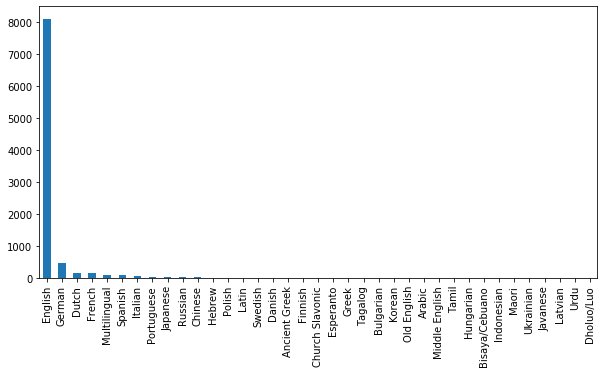

In [96]:
# language distribution
test_book_df['language'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (10,5)  )

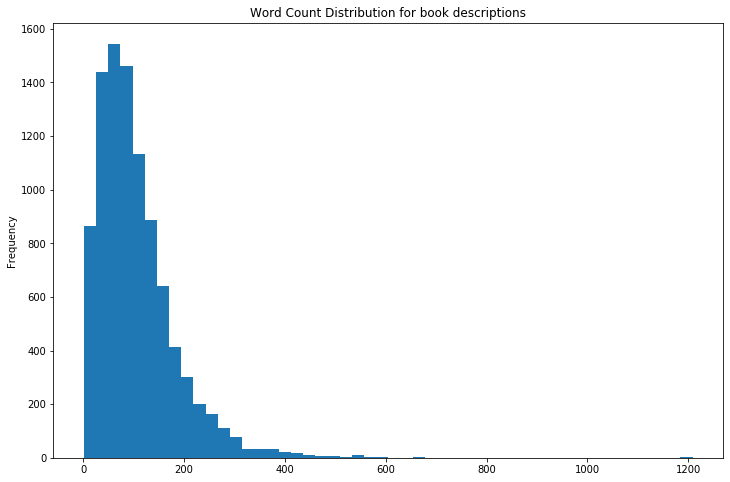

In [99]:
# Calculating the word count for book description
test_book_df['word_count'] = test_book_df['description'].apply(lambda x: len(str(x).split()))# Plotting the word count
test_book_df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for Librivox Audiobook descriptions')

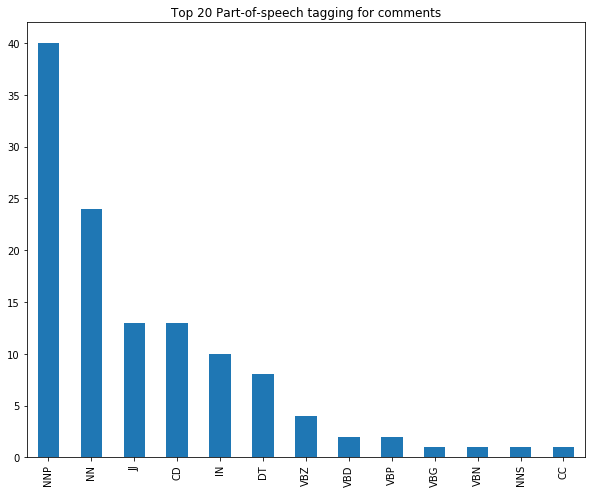

In [102]:
blob = TextBlob(str(test_book_df['description']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]

pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

In [115]:
for x in test_book_df['description']: 
    if x=='nan':
        print(x)

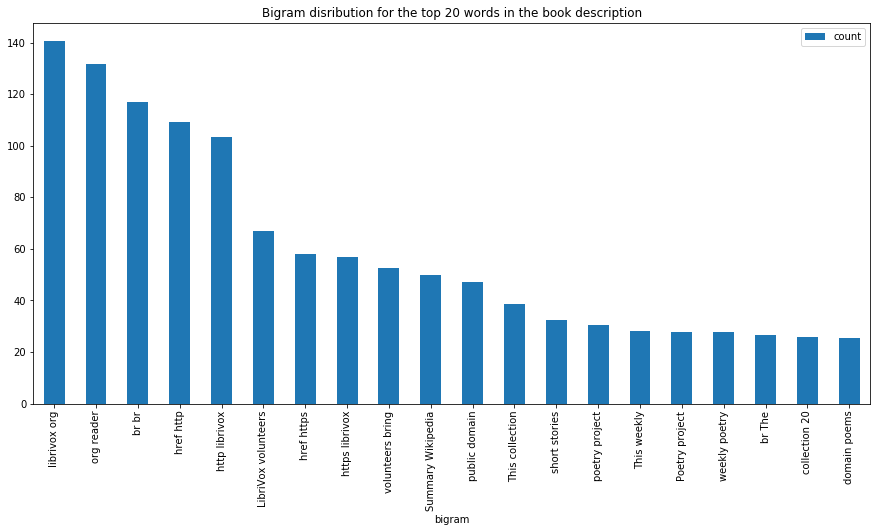

In [117]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(test_book_df['description'].values.astype('U'))
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

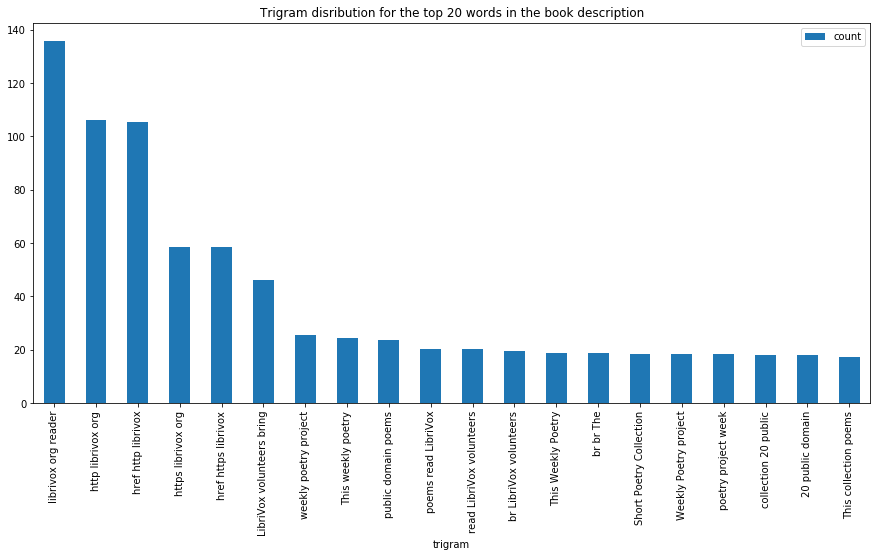

In [20]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(test_book_df['description'].values.astype('U'))
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram_20 = trigram.head(20)#Plotting the trigramn distribution
trigram_20.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [25]:
trigram.head(-20)

trigram       count
0       librivox org reader  135.843532
1         http librivox org  106.092255
2        href http librivox  105.348183
3        https librivox org   58.541533
4       href https librivox   58.438973
...                     ...         ...
508361  grimm Zaunkönig Der    0.002683
508362     Zaunkönig Der br    0.002683
508363  grimm Zaunkönig und    0.002683
508364    Zaunkönig und der    0.002683
508365          und der Bär    0.002683

[508366 rows x 2 columns]

#NEED LIBRIVOX-SPECIFIC STOPWORDS


In [9]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  int(i)<128)# Function for converting into lower case
def make_lower_case(text):
    return str(text).lower()# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)# Applying all the functions in description and storing as a cleaned_desc
test_book_df['cleaned_desc'] = test_book_df['description'].apply(func = make_lower_case)
# test_book_df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
test_book_df['cleaned_desc'] = test_book_df.cleaned_desc.apply(func = remove_stop_words)
test_book_df['cleaned_desc'] = test_book_df.cleaned_desc.apply(func=remove_punctuation)
test_book_df['cleaned_desc'] = test_book_df.cleaned_desc.apply(func=remove_html)

In [19]:
# Function for recommending books based on Book title. It takes book title and genre as an input.def recommend(title, genre):
    
title="Count of Monte Cristo"
language="English"

# Matching the language with the dataset and reset the index
data = test_book_df.loc[test_book_df['language'] == language]  
data.reset_index(level = 0, inplace = True) 
  
# Convert the index into series
indices = pd.Series(data.index, index = data['title'])

# print(indices)
    
#Converting the book title into vectors and used bigram
tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data['cleaned_desc'])

# print(tfidf_matrix)
    
    # Calculating the similarity measures based on Cosine Similarity
sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
# print(indices)    
# Get the index corresponding to original_title       
idx = indices[title]
# Get the pairwsie similarity scores 
sig = list(enumerate(sg[idx]))
# print(sig)
# Sort the books
sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar books 
sig = sig[1:6]
# Book indicies
movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
rec = data[['title']].iloc[movie_indices]
       
    # It reads the top 5 recommend book url and print the images
    
for i in rec['title']:
    print(i)
#         response = requests.get(i)
#         img = Image.open(BytesIO(response.content))
#         plt.figure()
#         print(plt.imshow(img))

Count of Monte Cristo (version 2)
Count of Monte Cristo (version 3)
Count of Monte Cristo (version 4 Dramatic Reading)
Three Musketeers
To Have And To Hold


In [21]:
books = test_book_df["lib_id"].unique().tolist()
len(books)

# shuffle customer ID's
random.shuffle(books)

# extract 90% of customer ID's
books_train = [books[i] for i in range(round(0.9*len(books)))]

# split data into train and validation set
train_df = test_book_df[test_book_df['lib_id'].isin(books_train)]
validation_df = test_book_df[~test_book_df['lib_id'].isin(books_train)]

In [22]:
# list to capture descriptions
descriptions_train = []

# populate the list with the description words
for i in tqdm(books_train):
    temp = train_df[train_df["lib_id"] == i]["description"].tolist()
    descriptions_train.append(temp)

100%|██████████| 8486/8486 [00:04<00:00, 1967.84it/s]


In [23]:
# list to capture purchase history of the customers
descriptions_val = []

# populate the list with the product codes
for i in tqdm(validation_df['lib_id'].unique()):
    temp = validation_df[validation_df["lib_id"] == i]["description"].tolist()
    descriptions_val.append(temp)

100%|██████████| 943/943 [00:00<00:00, 1988.75it/s]


In [27]:
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)
print(descriptions_train[: 5])
model.build_vocab(descriptions_train, progress_per=200)

model.train(descriptions_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

[["<p>Kottō contains 20 Japanese stories, collected from different sources and translated by Lafcadio Hearn. The types of stories in this collection are widespread: There are old ghost stories Hearn is best known for (The Legend of Yurei-Daki), his own observations and musings (Pathological), as well as the translation of 'A Woman's Diary', a touching account of the life of the poorer classes in Tokyo, written at the end of the 19th century.  (Summary by Availle)<p>"], ['<p>Door het lezen van te veel ridderromans is Don Quichot zijn verstand kwijtgeraakt. Denkend dat hij zelf een dolende ridder is, verlaat hij zijn huis en begint een dwaaltocht over de wegen en het platteland van Spanje, op zoek naar avonturen. Als doel heeft hij voor ogen het rechtzetten van alle soorten onrecht, om door deze goede daden beroemd te worden. Op zijn trektocht wordt Don Quichot vergezeld door zijn buurman en dienaar Sancho Panza. (naar Wikipedia)<br><br>\nThis is a Dutch translation and adaptation of th

TypeError: unsupported operand type(s) for +: 'float' and 'str'